In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.cluster import KMeans

In [4]:
X_df = pd.read_csv('../data/wheatseed.csv', usecols=["Area", "Perimeter", "Compactness", "Kernel.Length", "Kernel.Width", "Asymmetry.Coeff", "Kernel.Groove"])
y_df = pd.read_csv('../data/wheatseed.csv', usecols=["Type"])
X = np.array(X_df.to_numpy())
y = np.squeeze(np.array(y_df.to_numpy()))
print(X_df)
print(y_df)

      Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
5    14.38      14.21       0.8951          5.386         3.312   
6    14.69      14.49       0.8799          5.563         3.259   
7    16.63      15.46       0.8747          6.053         3.465   
8    16.44      15.25       0.8880          5.884         3.505   
9    15.26      14.85       0.8696          5.714         3.242   
10   14.03      14.16       0.8796          5.438         3.201   
11   13.89      14.02       0.8880          5.439         3.199   
12   13.78      14.06       0.8759          5.479         3.156   
13   13.74      14.05       0.8744          5.482         3.11

In [3]:
print(len(samples))

199


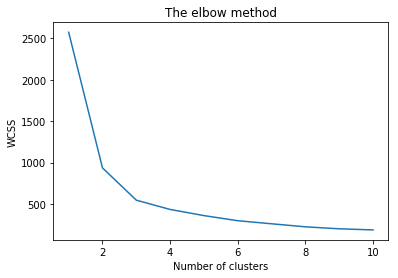

In [4]:
# Finding the optimum number of clusters for k-means classification
# Using the elbow method

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()



Text(0, 0.5, 'Perimeter')

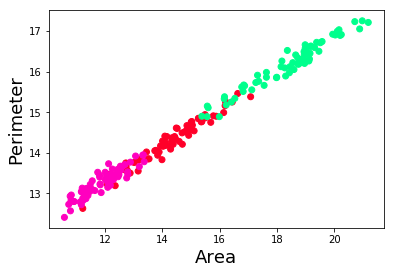

In [5]:
# Clearly we have an elbow at 3
# 0: "Area"
# 1: "Perimeter"
# 2: "Compactness"
# 3: "Kernel.Length"
# 4: "Kernel.Width"
# 5: "Asymmetry.Coeff"
# 6: "Kernel.Groove"
# Now onto different pair plots

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Area', fontsize=18)
plt.ylabel('Perimeter', fontsize=18)

Text(0, 0.5, 'Kernel.Width')

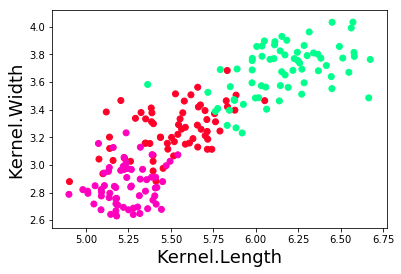

In [6]:
plt.scatter(X[:,3], X[:,4], c=y, cmap='gist_rainbow')
plt.xlabel('Kernel.Length', fontsize=18)
plt.ylabel('Kernel.Width', fontsize=18)

Text(0, 0.5, 'Compactness')

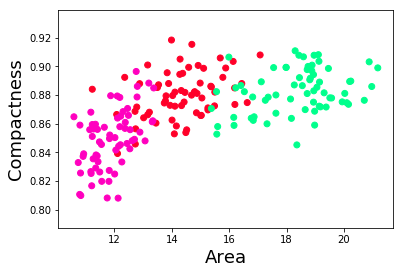

In [7]:
plt.scatter(X[:,0], X[:,2], c=y, cmap='gist_rainbow')
plt.xlabel('Area', fontsize=18)
plt.ylabel('Compactness', fontsize=18)

In [8]:
# K Means Algorithm applied here, Task 1
# Clear from the elbow method, we need to have three clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [9]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)
n_clusters=3

[[11.99458333 13.29055556  0.85231944  5.23556944  2.87631944  4.73304167
   5.09663889]
 [18.71966667 16.2995      0.884745    6.20988333  3.72128333  3.61626667
   6.06386667]
 [14.65731343 14.47283582  0.87820299  5.57362687  3.27565672  2.66252537
   5.19283582]]


Text(0.5, 1.0, 'Predicted')

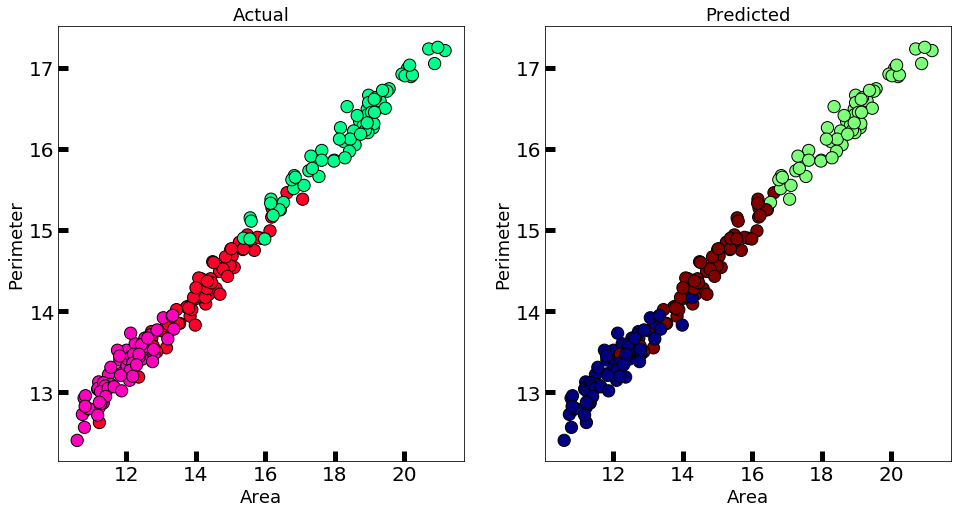

In [10]:
# Plot Between Area and Perimeter Actual and Predicted

new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Area', fontsize=18)
axes[0].set_ylabel('Perimeter', fontsize=18)
axes[1].set_xlabel('Area', fontsize=18)
axes[1].set_ylabel('Perimeter', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

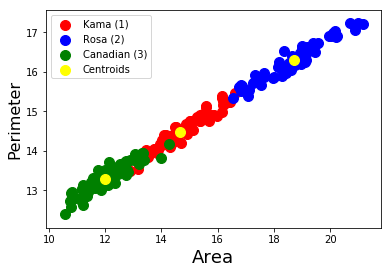

In [11]:
# Visualising the clusters, Area vs Perimeter

plt.xlabel('Area', fontsize=18)
plt.ylabel('Perimeter', fontsize=16)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Kama (1)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Rosa (2)')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Canadian (3)')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Text(0.5, 1.0, 'Predicted')

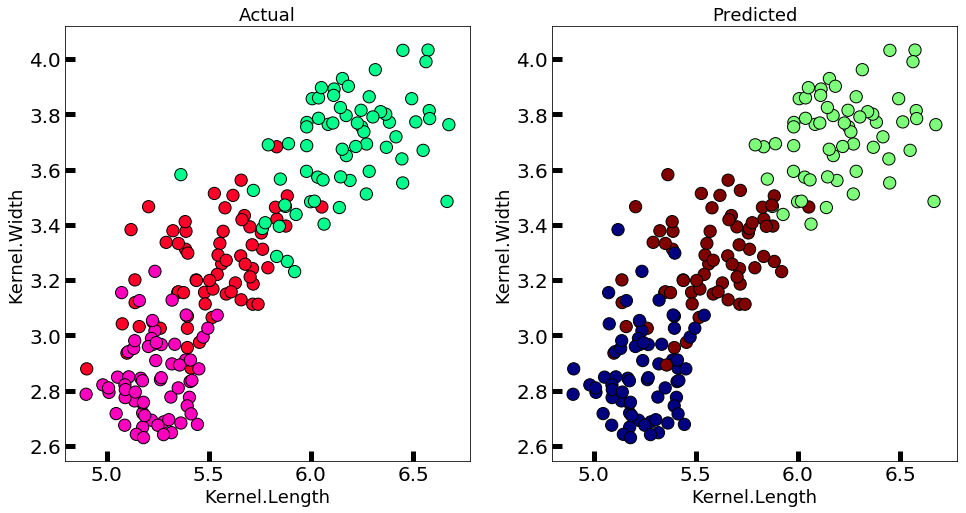

In [12]:
# Plot Between Kernel.Length and Kernel.Width Actual and Predicted

new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 3], X[:, 4], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 3], X[:, 4], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Kernel.Length', fontsize=18)
axes[0].set_ylabel('Kernel.Width', fontsize=18)
axes[1].set_xlabel('Kernel.Length', fontsize=18)
axes[1].set_ylabel('Kernel.Width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

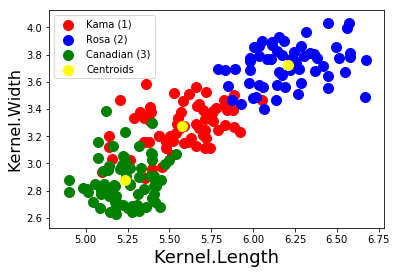

In [13]:
# Visualising the clusters, 

plt.xlabel('Kernel.Length', fontsize=18)
plt.ylabel('Kernel.Width', fontsize=16)
plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 4], s = 100, c = 'red', label = 'Kama (1)')
plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Rosa (2)')
plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 4], s = 100, c = 'green', label = 'Canadian (3)')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:,4], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Text(0.5, 1.0, 'Predicted')

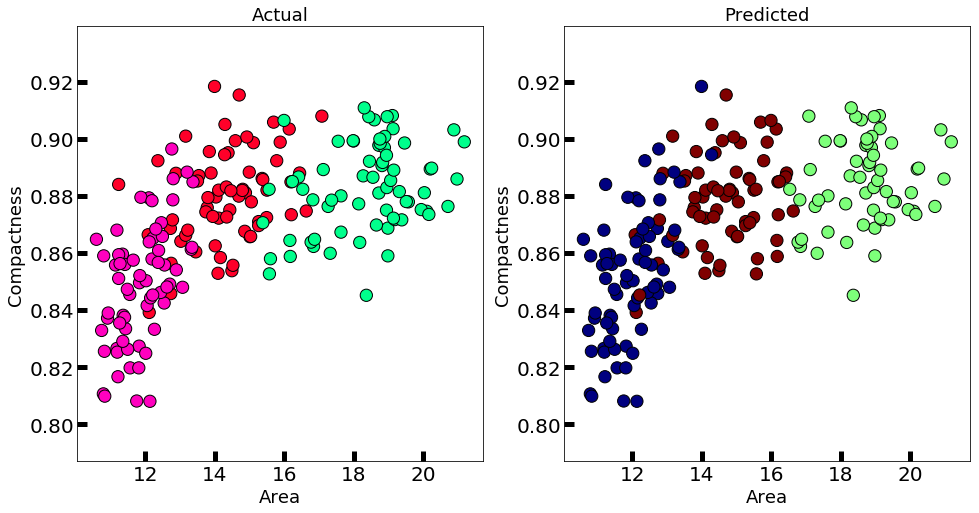

In [14]:
# Plot Between Area and Compactness Actual and Predicted

new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 2], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 2], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Area', fontsize=18)
axes[0].set_ylabel('Compactness', fontsize=18)
axes[1].set_xlabel('Area', fontsize=18)
axes[1].set_ylabel('Compactness', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

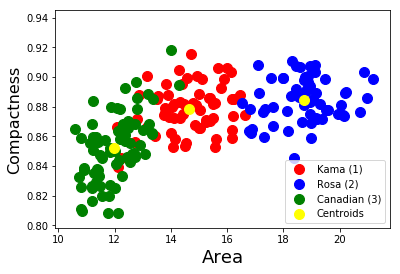

In [15]:
# Visualising the clusters, 

plt.xlabel('Area', fontsize=18)
plt.ylabel('Compactness', fontsize=16)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 100, c = 'red', label = 'Kama (1)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Rosa (2)')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 100, c = 'green', label = 'Canadian (3)')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [16]:
# Separate the points based as per their cluster centers

def get_cluster_points(x1, x2, x3, x4, x5, x6, x7):
    """
    Separate the cluster points specifically
    for the wheat seed dataset
    """
    datapoints = []
    for i in range(0, len(x1)):
        datapoints.append(
            [x1[i], x2[i], x3[i], x4[i], x5[i], x6[i], x7[i]]
        )
    return datapoints
    
x1_0 = X[y_kmeans == 0, 0]
x2_0 = X[y_kmeans == 0, 1]
x3_0 = X[y_kmeans == 0, 2]
x4_0 = X[y_kmeans == 0, 3]
x5_0 = X[y_kmeans == 0, 4]
x6_0 = X[y_kmeans == 0, 5]
x7_0 = X[y_kmeans == 0, 6]

x1_1 = X[y_kmeans == 1, 0]
x2_1 = X[y_kmeans == 1, 1]
x3_1 = X[y_kmeans == 1, 2]
x4_1 = X[y_kmeans == 1, 3]
x5_1 = X[y_kmeans == 1, 4]
x6_1 = X[y_kmeans == 1, 5]
x7_1 = X[y_kmeans == 1, 6]

x1_2 = X[y_kmeans == 2, 0]
x2_2 = X[y_kmeans == 2, 1]
x3_2 = X[y_kmeans == 2, 2]
x4_2 = X[y_kmeans == 2, 3]
x5_2 = X[y_kmeans == 2, 4]
x6_2 = X[y_kmeans == 2, 5]
x7_2 = X[y_kmeans == 2, 6]

get_cluster_points(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0, x7_0)
get_cluster_points(x1_1, x2_1, x3_1, x4_1, x5_1, x6_1, x7_1)
get_cluster_points(x1_2, x2_2, x3_2, x4_2, x5_2, x6_2, x7_2)

print(kmeans.cluster_centers_)

[[11.99458333 13.29055556  0.85231944  5.23556944  2.87631944  4.73304167
   5.09663889]
 [18.71966667 16.2995      0.884745    6.20988333  3.72128333  3.61626667
   6.06386667]
 [14.65731343 14.47283582  0.87820299  5.57362687  3.27565672  2.66252537
   5.19283582]]


In [17]:
# Generic euclidean distance fucntion

def euclidean_distance(data_point, center):
    """
    Generic euclidean distance fucntion
    """
    distance = 0
    for i in range(0, len(data_point)):
        distance = distance + (data_point[i]-center[i])**2
    return math.sqrt(distance)

def get_center_by_average(data):
    """
    Generic average datapoint of all clusters
    This center will be almost same as the Kmeans calculated center
    Maybe a solution to the above doubt asked?
    """

    average_distance=[]
    total = len(data)
    data_length = data[0]
    
    for i in range(0, len(data_length)):
        dist=0
        aver=0
        for data_point in data:
            dist = dist+data_point[i]
        average_distance.append(dist/total)

    print(average_distance)
    return average_distance

def closest_center(average_center):
    """
    Return the closest center by checking
    the minimum distance
    """

    index_array = []
    for i in range(0, len(cluster_centers)):
        index_array.append([i, euclidean_distance(average_center, cluster_centers[i])])
    print(index_array)
    min1 = 1000000000
    for i in range(0, len(index_array)):
        min1 = min(min1, index_array[i][1])
    
    index=-1;
    for point in index_array:
        if point[1]==min1:
            index=point[0]
            break
    print(index)
    return cluster_centers[index]

def all_distance_from_clusters(center, data):
    """
    get euclidean distance from the center
    """

    dist_arr = []
    for point in data:
        dist_arr.append(euclidean_distance(point, center))
    return dist_arr

In [18]:
# Distance between cluster centers and every data point in the dataset

print(kmeans.cluster_centers_)
get_center_by_average(get_cluster_points(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0, x7_0))
get_center_by_average(get_cluster_points(x1_1, x2_1, x3_1, x4_1, x5_1, x6_1, x7_1))
get_center_by_average(get_cluster_points(x1_2, x2_2, x3_2, x4_2, x5_2, x6_2, x7_2))

closest_center(get_center_by_average(get_cluster_points(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0, x7_0)))

[[11.99458333 13.29055556  0.85231944  5.23556944  2.87631944  4.73304167
   5.09663889]
 [18.71966667 16.2995      0.884745    6.20988333  3.72128333  3.61626667
   6.06386667]
 [14.65731343 14.47283582  0.87820299  5.57362687  3.27565672  2.66252537
   5.19283582]]
[11.994583333333331, 13.29055555555556, 0.8523194444444449, 5.235569444444444, 2.8763194444444453, 4.733041666666667, 5.0966388888888865]
[18.719666666666665, 16.2995, 0.8847449999999999, 6.209883333333332, 3.7212833333333326, 3.616266666666667, 6.063866666666667]
[14.657313432835819, 14.472835820895519, 0.8782029850746269, 5.573626865671644, 3.2756567164179113, 2.6625253731343284, 5.192835820895523]
[11.994583333333331, 13.29055555555556, 0.8523194444444449, 5.235569444444444, 2.8763194444444453, 4.733041666666667, 5.0966388888888865]
[[0, 6.0402662910232525e-15], [1, 7.624140045213097], [2, 3.6136730364863947]]
0


array([11.99458333, 13.29055556,  0.85231944,  5.23556944,  2.87631944,
        4.73304167,  5.09663889])

In [19]:
# Task 2, get all the distances from it's corresponding center

all_0 = all_distance_from_clusters(
    closest_center(get_center_by_average(get_cluster_points(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0, x7_0))),
    get_cluster_points(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0, x7_0),
)

all_1 = all_distance_from_clusters(
    closest_center(get_center_by_average(get_cluster_points(x1_1, x2_1, x3_1, x4_1, x5_1, x6_1, x7_1))),
    get_cluster_points(x1_1, x2_1, x3_1, x4_1, x5_1, x6_1, x7_1),
)

all_2 = all_distance_from_clusters(
    closest_center(get_center_by_average(get_cluster_points(x1_2, x2_2, x3_2, x4_2, x5_2, x6_2, x7_2))),
    get_cluster_points(x1_2, x2_2, x3_2, x4_2, x5_2, x6_2, x7_2),
)

min0 = np.min(all_0)
max0 = np.max(all_0)
print(max0)

min1 = np.min(all_1)
max1 = np.max(all_1)
print(max1)

min2 = np.min(all_2)
max2 = np.max(all_2)

print(min0, max0)
print(min1, max1)
print(min2, max2)

max_min_arr = []
max_min_arr.append([min0, max0])
max_min_arr.append([min1, max1])
max_min_arr.append([min2, max2])


[11.994583333333331, 13.29055555555556, 0.8523194444444449, 5.235569444444444, 2.8763194444444453, 4.733041666666667, 5.0966388888888865]
[[0, 6.0402662910232525e-15], [1, 7.624140045213097], [2, 3.6136730364863947]]
0
[18.719666666666665, 16.2995, 0.8847449999999999, 6.209883333333332, 3.7212833333333326, 3.616266666666667, 6.063866666666667]
[[0, 7.624140045213092], [1, 5.421936431859633e-15], [2, 4.702252777256555]]
1
[14.657313432835819, 14.472835820895519, 0.8782029850746269, 5.573626865671644, 3.2756567164179113, 2.6625253731343284, 5.192835820895523]
[[0, 3.6136730364863925], [1, 4.702252777256562], [2, 4.440892098500626e-15]]
2
3.8143674445694598
3.4381895247228407
0.2515151088287457 3.8143674445694598
0.216254495707924 3.4381895247228407
0.17121919536174962 3.1840272408261536


In [20]:
# get variance
# as we have seen that the distance between Kmean center and the
# average center is negligible, so considering average center
# to be the cluster center

var0 = np.var(all_0)
print(var0)

var1 = np.var(all_1)
print(var1)

var2 = np.var(all_2)
print(var2)

var_arr = []
var_arr.append(var0)
var_arr.append(var1)
var_arr.append(var2)

# Calculate number of points within the 90 % of the cluster
# in all the clusters

def num_of_points_within(max1, data):
    """
    number of points within the 90 % of the cluster
    in all the clusters
    """
    tot = 0
    for dist in data:
        if dist<(0.9*max1):
            tot=tot+1
    print(tot)
    return tot

num_0 = num_within_0 = num_of_points_within(
    max0,
    all_0
)
num_1 = num_within_1 = num_of_points_within(
    max1,
    all_1
)
num_2 = num_within_2 = num_of_points_within(
    max2,
    all_2
)

num_within = []
num_within.append([num_0, len(all_0)])
num_within.append([num_1, len(all_1)])
num_within.append([num_2, len(all_2)])

0.515203164441043
0.5851616732317656
0.5513951592094533
71
57
64


In [21]:
lab=kmeans.labels_
from sklearn.metrics import silhouette_score

sc=silhouette_score(X, kmeans.labels_)
print(sc)

0.4727232858211616


In [22]:
print("There are {number} clusters".format(number=n_clusters))
for i in range(n_clusters):
    print("The cluster {i} centre are found to be {centre}".format(i=i+1,centre=cluster_centers[i]))

for i in range(n_clusters):
    max_generic = max_min_arr[i][1]
    min_generic = max_min_arr[i][0]
    var_generic = var_arr[i]
    print(f"For cluster {i+1}, maximum datapoint distance is {max_generic}")
    print(f"For cluster {i+1}, minimum datapoint distance is {min_generic}")
    print(f"For cluster {i+1}, variance is {var_generic}")

print("The labels for each of them are {lab} ".format(lab=lab))
print("The Silhouette score is {sc}".format(sc=sc))
print("Considering points outside 90% radius of cluster as outliers: ")

for i in range(n_clusters):
    tot_generic = num_within[i][1]
    outliers_generic = tot_generic-num_within[i][0]
    print(f"For cluster {i+1}, outliers are {outliers_generic} out of {tot_generic}")

There are 3 clusters
The cluster 1 centre are found to be [11.99458333 13.29055556  0.85231944  5.23556944  2.87631944  4.73304167
  5.09663889]
The cluster 2 centre are found to be [18.71966667 16.2995      0.884745    6.20988333  3.72128333  3.61626667
  6.06386667]
The cluster 3 centre are found to be [14.65731343 14.47283582  0.87820299  5.57362687  3.27565672  2.66252537
  5.19283582]
For cluster 1, maximum datapoint distance is 3.8143674445694598
For cluster 1, minimum datapoint distance is 0.2515151088287457
For cluster 1, variance is 0.515203164441043
For cluster 2, maximum datapoint distance is 3.4381895247228407
For cluster 2, minimum datapoint distance is 0.216254495707924
For cluster 2, variance is 0.5851616732317656
For cluster 3, maximum datapoint distance is 3.1840272408261536
For cluster 3, minimum datapoint distance is 0.17121919536174962
For cluster 3, variance is 0.5513951592094533
The labels for each of them are [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2